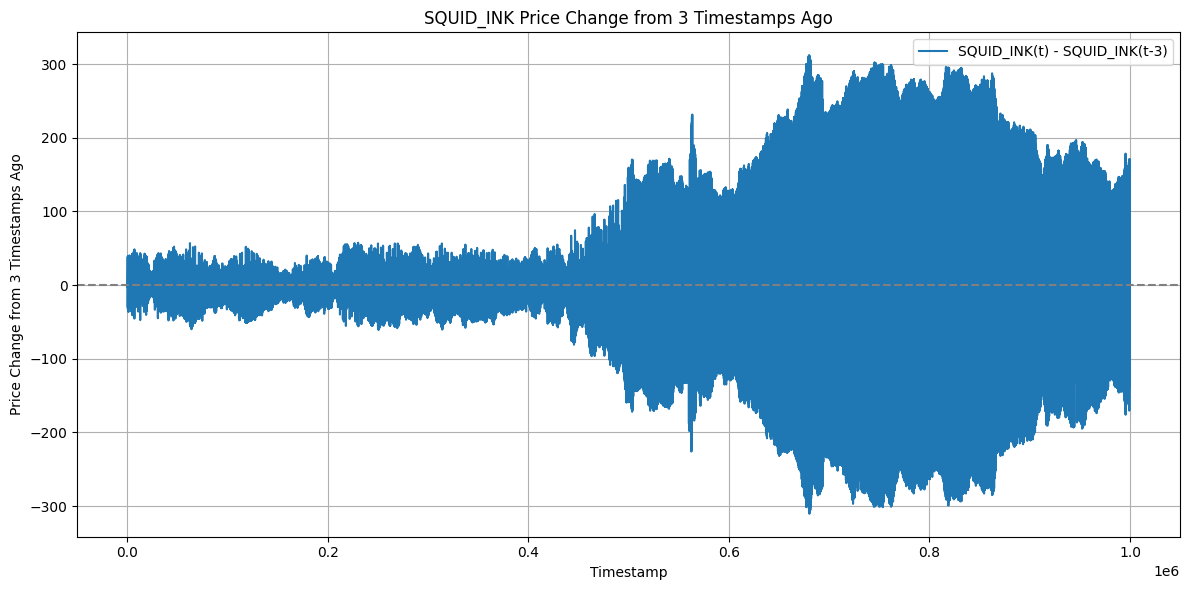

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load the data ---
df_m2 = pd.read_csv("prices_round_1_day_-2.csv", delimiter=";")
df_m1 = pd.read_csv("prices_round_1_day_-1.csv", delimiter=";")
df_0 = pd.read_csv("prices_round_1_day_0.csv", delimiter=";")

# --- Add 'day' column for tracking ---
df_m2["day"] = -2
df_m1["day"] = -1
df_0["day"] = 0

# --- Concatenate into one DataFrame ---
df_all = pd.concat([df_m2, df_m1, df_0], ignore_index=True)

# --- Filter for SQUID_INK only ---
squid_df = df_all[df_all["product"] == "SQUID_INK"].copy()

# --- Ensure timestamp is numeric ---
squid_df["timestamp"] = pd.to_numeric(squid_df["timestamp"], errors="coerce")

# --- Sort by timestamp in case it's not already ---
squid_df.sort_values("timestamp", inplace=True)

# --- Reset index for easy alignment ---
squid_df.reset_index(drop=True, inplace=True)

# --- Compute change from 3 timestamps ago ---
# This is: current - price from 3 timestamps ago
squid_df["change_from_3_ago"] = squid_df["mid_price"] - squid_df["mid_price"].shift(3)

# --- Drop rows where that diff is NaN (first 3 rows) ---
squid_df.dropna(subset=["change_from_3_ago"], inplace=True)

# --- Plot it ---
plt.figure(figsize=(12, 6))
plt.plot(squid_df["timestamp"], squid_df["change_from_3_ago"], label="SQUID_INK(t) - SQUID_INK(t-3)")
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Timestamp")
plt.ylabel("Price Change from 3 Timestamps Ago")
plt.title("SQUID_INK Price Change from 3 Timestamps Ago")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


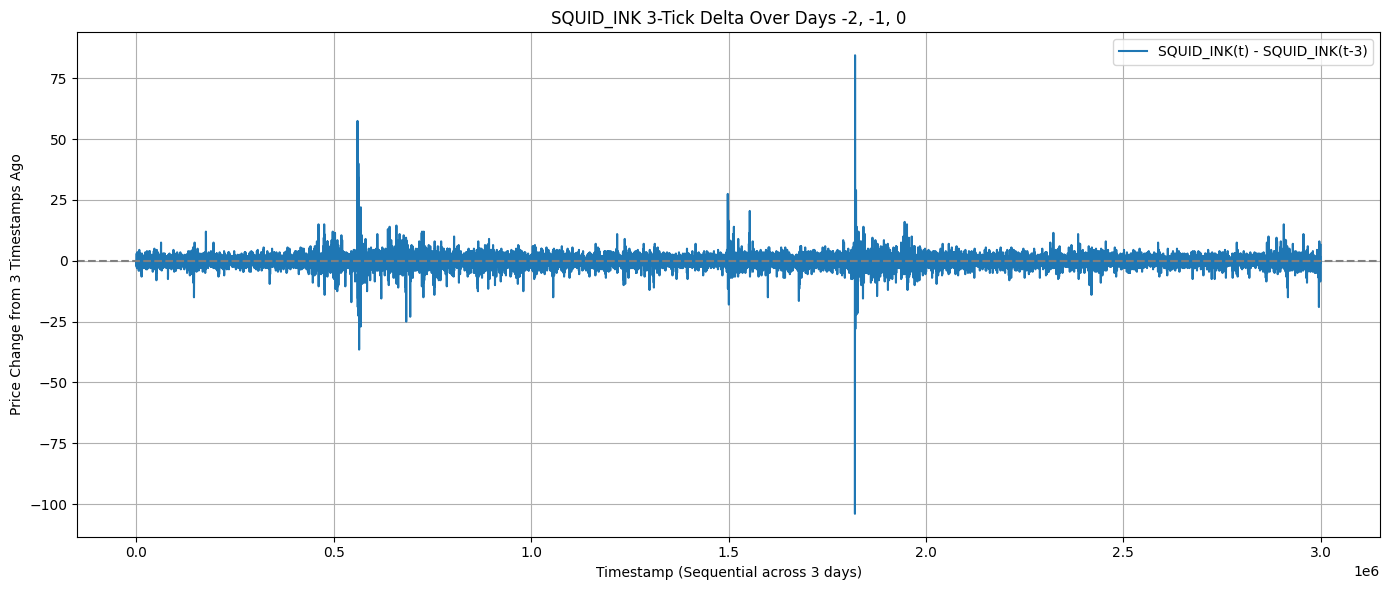

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_m2 = pd.read_csv("prices_round_1_day_-2.csv", delimiter=";")
df_m1 = pd.read_csv("prices_round_1_day_-1.csv", delimiter=";")
df_0 = pd.read_csv("prices_round_1_day_0.csv", delimiter=";")

# Define offset amount (assumes ~1 million timestamps per day)
OFFSET = 1_000_000

# Apply day-wise offsets to timestamps
df_m2["timestamp"] += 0 * OFFSET   # leave as-is
df_m1["timestamp"] += 1 * OFFSET   # shift forward by 1 million
df_0["timestamp"] += 2 * OFFSET   # shift forward by 2 million

# Combine with tracking column if desired
df_all = pd.concat([df_m2.assign(day=-2), df_m1.assign(day=-1), df_0.assign(day=0)], ignore_index=True)

# Filter for SQUID_INK
squid_df = df_all[df_all["product"] == "SQUID_INK"].copy()

# Sort and reset index
squid_df.sort_values("timestamp", inplace=True)
squid_df.reset_index(drop=True, inplace=True)

# Compute difference from 3 timestamps ago
squid_df["change_from_3_ago"] = squid_df["mid_price"] - squid_df["mid_price"].shift(3)

# Drop NaNs
squid_df.dropna(subset=["change_from_3_ago"], inplace=True)

# Plot it
plt.figure(figsize=(14, 6))
plt.plot(squid_df["timestamp"], squid_df["change_from_3_ago"], label="SQUID_INK(t) - SQUID_INK(t-3)")
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Timestamp (Sequential across 3 days)")
plt.ylabel("Price Change from 3 Timestamps Ago")
plt.title("SQUID_INK 3-Tick Delta Over Days -2, -1, 0")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


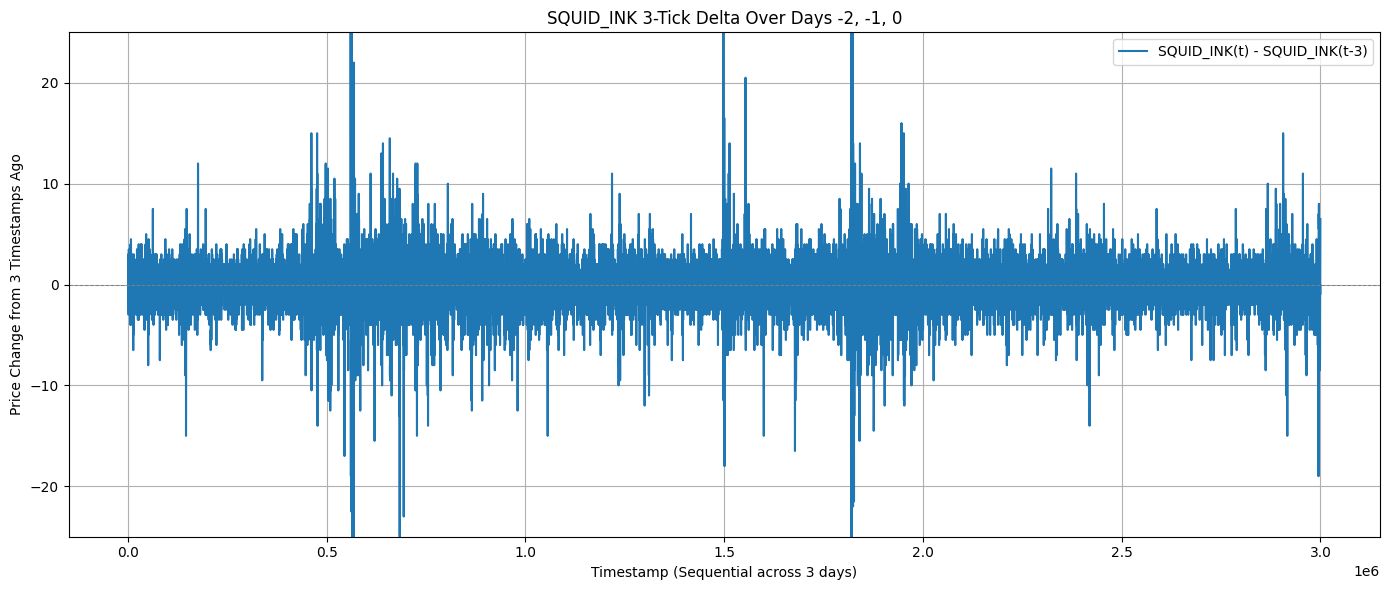

In [29]:
plt.figure(figsize=(14, 6))
plt.plot(squid_df["timestamp"], squid_df["change_from_3_ago"], label="SQUID_INK(t) - SQUID_INK(t-3)", color="tab:blue")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.xlabel("Timestamp (Sequential across 3 days)")
plt.ylabel("Price Change from 3 Timestamps Ago")
plt.title("SQUID_INK 3-Tick Delta Over Days -2, -1, 0")
plt.ylim(-25, 25)  # Zoom in on Y-axis
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
